### Muhammad Zeeshan Akhtar


### Task 4

Live Weather Report of Islamabad (with Plot)

City: Islamabad
Temperature: 31.58°C
Humidity: 45%
Weather Description: clear sky
Time: Night
Current Time: 11:23 PM
Day: Wednesday
No rainfall in the last hour


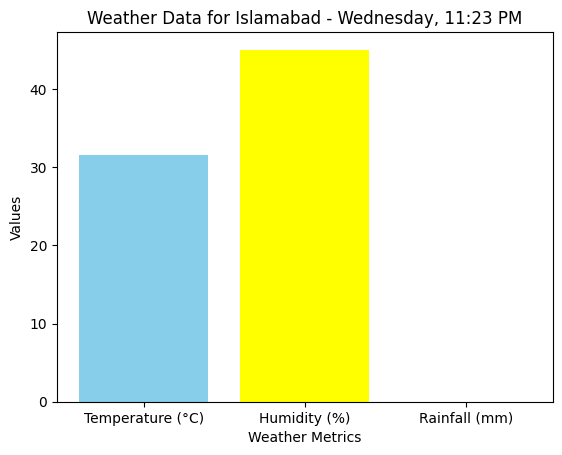

In [1]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime
import pytz  # For timezone support

API_KEY = "9c29da54f94a6e6a659b976600aca93a"
CITY = "Islamabad"
URL = f"http://api.openweathermap.org/data/2.5/weather?q={CITY}&appid={API_KEY}&units=metric"

response = requests.get(URL)

if response.status_code == 200:
    data = response.json()
    
    temp = data['main']['temp']
    humidity = data['main']['humidity']
    description = data['weather'][0]['description']
    
    # Day or Night check
    icon = data['weather'][0]['icon']
    if icon.endswith('d'):
        time_of_day = "Day"
    else:
        time_of_day = "Night"
    
    # Get current local time and day name
    timezone = pytz.timezone("Asia/Karachi")  # For Islamabad
    now = datetime.now(timezone)
    local_time = now.strftime("%I:%M %p")       # e.g. 02:35 PM
    day_name = now.strftime("%A")               # e.g. Sunday, Monday, etc.

    if 'rain' in data:
        rain = data['rain'].get('1h', 0)  
    else:
        rain = 0  
    
    # Display weather info
    print(f"City: {CITY}")
    print(f"Temperature: {temp}°C")
    print(f"Humidity: {humidity}%")
    print(f"Weather Description: {description}")
    print(f"Time: {time_of_day}")
    print(f"Current Time: {local_time}")
    print(f"Day: {day_name}")
    
    if rain > 0:
        print(f"Rainfall: {rain} mm in the last hour")
    else:
        print("No rainfall in the last hour")
    
    # Plotting the weather data
    weather_data = {
        'Temperature (°C)': temp,
        'Humidity (%)': humidity,
        'Rainfall (mm)': rain
    }

    # Create a bar plot
    plt.bar(weather_data.keys(), weather_data.values(), color=['skyblue', 'yellow', 'blue'])
    plt.xlabel('Weather Metrics')
    plt.ylabel('Values')
    plt.title(f"Weather Data for {CITY} - {day_name}, {local_time}")
    plt.show()

else:
    print("Failed to get data:", response.status_code)


Lahore: 30.99°C
Burewala: 37.78°C
Karachi: 29.9°C
Faisalabad: 37.5°C
Murree: 22.29°C


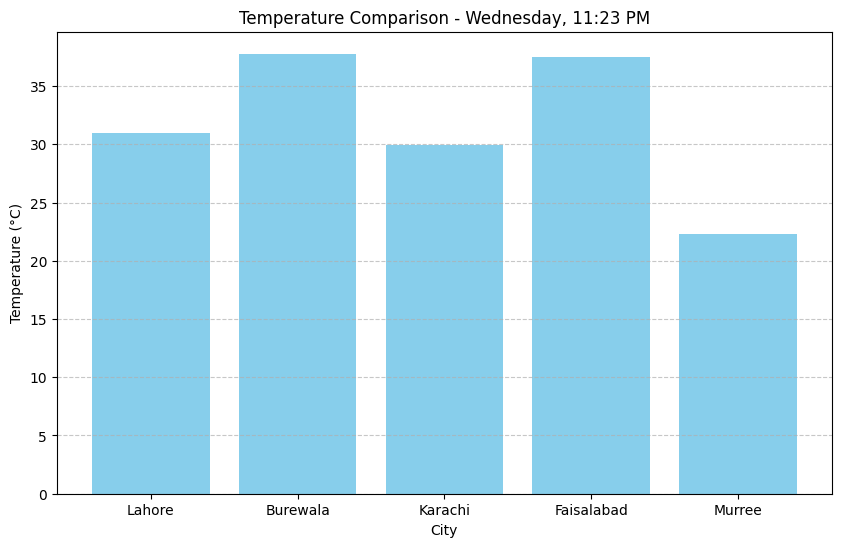

In [2]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime
import pytz

API_KEY = "9c29da54f94a6e6a659b976600aca93a"
cities = ["Lahore", "Burewala", "Karachi", "Faisalabad", "Murree"]

# Set timezone for Pakistan
timezone = pytz.timezone("Asia/Karachi")
now = datetime.now(timezone)
local_time = now.strftime("%I:%M %p")
day_name = now.strftime("%A")

temperatures = []
successful_cities = []

for CITY in cities:
    URL = f"http://api.openweathermap.org/data/2.5/weather?q={CITY}&appid={API_KEY}&units=metric"
    response = requests.get(URL)

    if response.status_code == 200:
        data = response.json()
        temp = data['main']['temp']
        temperatures.append(temp)
        successful_cities.append(CITY)
        print(f"{CITY}: {temp}°C")
    else:
        print(f"Failed to get data for {CITY}")

# Plotting one chart for all cities' temperatures
plt.figure(figsize=(10, 6))
plt.bar(successful_cities, temperatures, color='skyblue')
plt.xlabel('City')
plt.ylabel('Temperature (°C)')
plt.title(f"Temperature Comparison - {day_name}, {local_time}")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
